<a href="https://colab.research.google.com/github/zeze1004/AI/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import torch
import torch.optim as optim
import csv
import torch.nn as nn

wine_path = "https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/tabular-wine/winequality-white.csv"
#wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype = np.float32, delimiter = ";", skiprows = 1)
wine_data = pd.read_csv(wine_path, delimiter=';')
wineq_numpy

wineq = torch.from_numpy(wineq_numpy)
wineq.shape # columns and rows
wineq.dtype

wineq_numpy.shape

(4898, 12)

**와인의 qulity 데이터를 포함해 qulity를 결정하는 12개의 데이터를 입력 받았다.**

In [100]:
# quality data를 target으로 설정
target = wineq[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [102]:
# wineq에서 quality열 제거
data = wineq[:, :-1] 
data.shape

torch.Size([4898, 11])

**와인 데이터에서 qulity를 제외해 12열에서 11열으로 줄은 것을 확인할 수 있다.**

In [12]:
# target을 onehot vector로 만듦
onehot_target = torch.zeros(target.shape[0],10)
onehot_target.scatter_(1, target.unsqueeze(1),1.0)
target = onehot_target
target

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [13]:
n_samples = data.shape[0]
n_samples
# validation data 
n_val = int(0.2 * n_samples)

**직전 과제를 참고해 전체 데이터의 20%는 validation data로 설정했다.**

In [16]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 477, 3567, 4600,  ..., 4366,  657, 1734])

In [105]:
# training data, validation data 분리
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

target_t = target[train_indices]
data_t = data[train_indices]
target_v = target[val_indices]
data_v = data[val_indices]


In [128]:
# optimazer = SGD
# ---------------
loss_val_data = [] # validation data의 loss 값을 저장하는 리스트
loss_train_data = [] # train data의 loss 값을 저장하는 리스트

# 트레이닝 루프
import torch.nn as nn
def training_loop(n_epochs, optimizer, model, loss_fn, data_t, data_v,
                  target_t, target_v):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(data_train) # <1>
        loss_train = loss_fn(t_p_train, target_train)
        t_p_val = model(data_val) 
        loss_val = loss_fn(t_p_val, target_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        loss_val_data.append(loss_val.item())
        loss_train_data.append(loss_train.item())
        if epoch == 1 or epoch % 1000 == 0:
          print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

linear_model = nn.Linear(11, 10)
learning_rate = 1e-4
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), 
    data_t = data_t,
    data_v = data_v, 
    target_t = target_t,
    target_v = target_v)


Epoch 1, Training loss 437.2275, Validation loss 428.2941
Epoch 1000, Training loss 0.5319, Validation loss 0.5367
Epoch 2000, Training loss 0.2818, Validation loss 0.2822
Epoch 3000, Training loss 0.1735, Validation loss 0.1724
Epoch 4000, Training loss 0.1249, Validation loss 0.1235
Epoch 5000, Training loss 0.1027, Validation loss 0.1014
Epoch 6000, Training loss 0.0924, Validation loss 0.0912
Epoch 7000, Training loss 0.0875, Validation loss 0.0863
Epoch 8000, Training loss 0.0849, Validation loss 0.0839
Epoch 9000, Training loss 0.0835, Validation loss 0.0825
Epoch 10000, Training loss 0.0826, Validation loss 0.0816


**optimazer로 SGD를 선택하여 학습시켰다. 과적합이 일어나지 않게끔 학습률을 조정하며 결과를 냈다.**
**아래는 Adam을 이용해 학습을 시켰다. 성능 비교를 위해 epoch와 학습률을 동일하게 설정했다.**

In [165]:
# optimazer = Adam
# ---------------
loss_val_data = [] # validation data의 loss 값을 저장하는 리스트
loss_train_data = [] # train data의 loss 값을 저장하는 리스트

# 트레이닝 루프
import torch.nn as nn
def training_loop(n_epochs, optimizer, model, loss_fn, data_t, data_v,
                  target_t, target_v):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(data_train) # <1>
        loss_train = loss_fn(t_p_train, target_train)
        t_p_val = model(data_val) 
        loss_val = loss_fn(t_p_val, target_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        loss_val_data.append(loss_val.item())
        loss_train_data.append(loss_train.item())
        if epoch == 1 or epoch % 1000 == 0:
          print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

linear_model = nn.Linear(11, 10)
learning_rate = 1e-4
optimizer = optim.Adam(linear_model.parameters(), lr=learning_rate)

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), 
    data_t = data_t,
    data_v = data_v, 
    target_t = target_t,
    target_v = target_v)


Epoch 1, Training loss 670.0908, Validation loss 657.4225
Epoch 1000, Training loss 186.8427, Validation loss 183.0263
Epoch 2000, Training loss 41.3442, Validation loss 40.4116
Epoch 3000, Training loss 7.2349, Validation loss 7.0126
Epoch 4000, Training loss 2.9148, Validation loss 2.8245
Epoch 5000, Training loss 2.1080, Validation loss 2.0695
Epoch 6000, Training loss 1.5600, Validation loss 1.5480
Epoch 7000, Training loss 1.1497, Validation loss 1.1470
Epoch 8000, Training loss 0.8149, Validation loss 0.8143
Epoch 9000, Training loss 0.5278, Validation loss 0.5276
Epoch 10000, Training loss 0.3038, Validation loss 0.3033


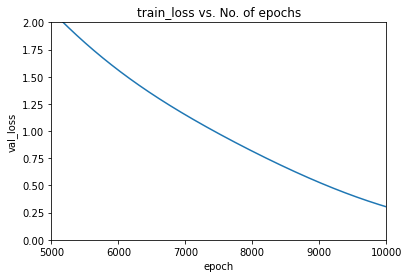

In [169]:
# optimazer 'Adam' 사용시
# epoch에 따른 train data training loss 그래프
from matplotlib import pyplot as plt
import numpy as np
n_epochs = 10000
plt.title('train_loss vs. No. of epochs');
x = range(n_epochs)
y = loss_train_data
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.xlim(5000,10000) # y축 범위
plt.ylim(0,2) # y축 범위
plt.plot(x,y)
plt.show()

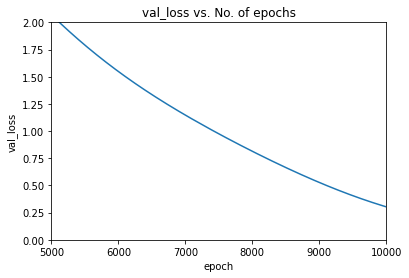

In [168]:
# epoch에 따른 validation data training loss 그래프
from matplotlib import pyplot as plt
import numpy as np
plt.title('val_loss vs. No. of epochs');
x = range(n_epochs)
y = loss_val_data
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.xlim(5000,10000) # y축 범위
plt.ylim(0,2) # y축 범위
plt.plot(x,y)
plt.show()

**Adam 결과를 먼저 살펴보자.**
**많은 데이터가 아님에도 Adam은 SGD보다 출력 속도가 늦었다. 뿐만 아니라 loss도 SGD보다 높게 출력 되었다. 학습률을 더 높이면 속도를 향상시킬 수 있으며 loss도 낮게 나온다. 그러나 같은 조건이라면 간단한 데이터에서는 SGD가 더 높은 성능을 보임을 알 수 있었다.**

**아래 SGD 그래프를 통해 성능을 확인할 수 있다.**

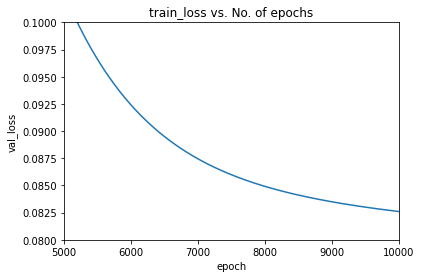

In [157]:
# optimazer 'SGD' 사용시
# epoch에 따른 train data training loss 그래프
from matplotlib import pyplot as plt
import numpy as np
n_epochs = 10000
plt.title('train_loss vs. No. of epochs');
x = range(n_epochs)
y = loss_train_data
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.xlim(5000,10000) # X축 범위
plt.ylim(0.08,0.1) # y축 범위
plt.plot(x,y)
plt.show()

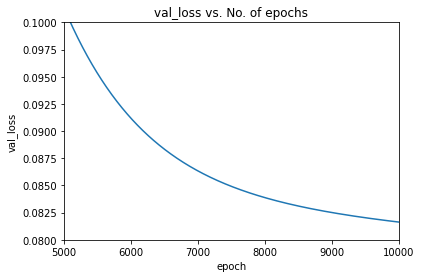

In [159]:
# epoch에 따른 validation data training loss 그래프
from matplotlib import pyplot as plt
import numpy as np
plt.title('val_loss vs. No. of epochs');
x = range(n_epochs)
y = loss_val_data
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.xlim(5000,10000) # X축 범위
plt.ylim(0.08,0.1) # y축 범위
plt.plot(x,y)
plt.show()